In [1]:
import cv2
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
import numpy as np
from skimage.restoration import denoise_nl_means, estimate_sigma

In [2]:
#Tolal variation filtering
img = img_as_float(io.imread(r'attack_test\adv_images\advairplane.jpg'))

denoise_img = denoise_tv_chambolle(img, 
                                   weight=0.1,
                                   eps=0.0002,
                                   max_num_iter=200,
                                   channel_axis=2)

In [3]:
#Non-Local means
sigma_est = np.mean(estimate_sigma(denoise_img, channel_axis=2))

denoise_img = denoise_nl_means(denoise_img, h=1.15 * sigma_est,
                               fast_mode=True,
                               patch_size=5,
                               patch_distance=3,
                               channel_axis=2)

In [4]:
from skimage import img_as_ubyte

img_as_8byte = img_as_ubyte(img)
denoise_img_as_8byte = img_as_ubyte(denoise_img)

original_img = cv2.cvtColor(img_as_8byte, cv2.COLOR_BGR2RGB)
final_denoised_img = cv2.cvtColor(denoise_img_as_8byte, cv2.COLOR_BGR2RGB)

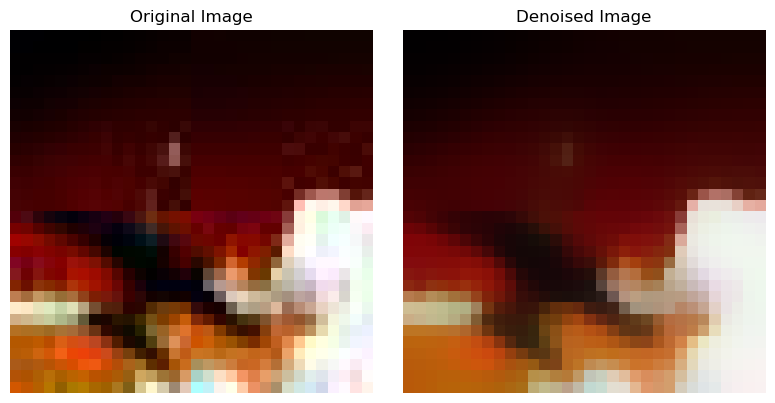

In [5]:
import matplotlib.pyplot as plt

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# Display the denoised image
plt.subplot(1, 2, 2)
plt.imshow(final_denoised_img)
plt.title('Denoised Image')
plt.axis('off')

# Show the images
plt.tight_layout()
plt.show()

# Save the denoised image
# output_image_path = r'attack_test\adv_denoise\nlm_tv_img\nlm_tv_ship.jpg' 
# cv2.imwrite(output_image_path, final_denoised_img)